# Reducción de dimensionalidad

In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
import sklearn.manifold # Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding
import matplotlib.pyplot as plt

## Introducción

Esta tarea de aprendizaje no supervisado nos permite disminuir la cantidad de variables de un conjunto de datos intentando no perder información del espacio original

Utilizaremos el conjunto de datos MNIST, el cual contiene imágenes de dígitos manuscritos.

In [2]:
data = pd.read_csv("data/mnist.csv")

In [4]:
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


El conjunto de datos contiene 1797 imágenes y 65 atributos (pixeles + etiqueta)

In [5]:
data.shape

(1797, 65)

Guardamos en variables distintas los pixeles y la etiqueta.

In [22]:
pixels = data.iloc[:,:-1]
label = data.label

Así se ve el conjunto de datos.

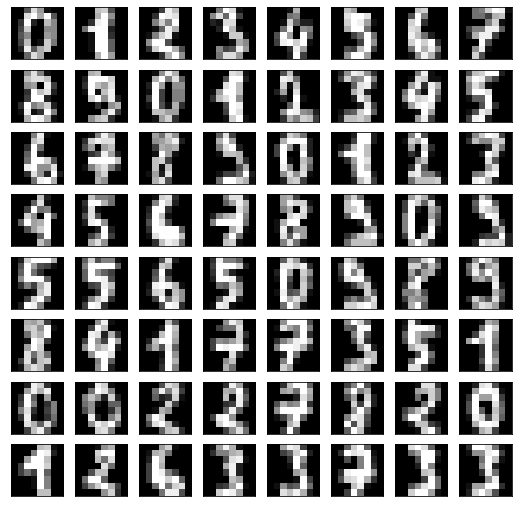

In [25]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        pixels.iloc[i,:].values.reshape(8,-1),
        cmap="gray"
    )

Ajustemos un PCA sobre el conjunto de datos.

## Modelamiento

In [26]:
pca_mnist = sklearn.decomposition.PCA()
pca_mnist.fit(pixels)

PCA()

Obtenemos una matriz con 64 componentes.

In [27]:
pca_mnist.components_.shape

(64, 64)

Así se ve el primer componente.

In [28]:
pca_mnist.components_[0]

array([-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, -1.35913304e-01,
       -3.30323092e-02, -9.66340844e-02, -8.32943805e-03,  2.26900082e-03,
       -3.20516495e-04, -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
       -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,  4.47779518e-03,
       -4.94136398e-05, -7.95419375e-02,  8.33951454e-02,  2.15915342e-01,
       -1.72126801e-01, -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
        9.85488574e-05,  6.42319144e-02,  2.54093316e-01, -3.56771026e-02,
       -2.09462569e-01, -4.31311420e-02,  5.13118688e-02,  2.13422732e-04,
       -0.00000000e+00,  1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
        8.52007908e-02,  3.72982855e-02,  2.15866980e-02, -0.00000000e+00,
        1.28865585e-03,  1.06945287e-01,  3.03067457e-01,  2.47813041e-01,
        2.09637296e-01,  1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
        6.93023548e-04, -8.35144239e-03, -5.58598986e-02,  9.30534169e-02,
        1.07387720e-01, -

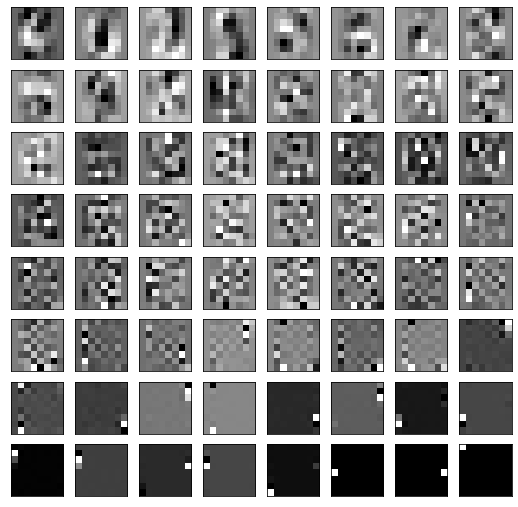

In [29]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        pca_mnist.components_[i].reshape(8,-1),
        cmap="gray"
    )

Acá podemos ver cuánta varianza explica cada uno de los 64 componentes.

In [30]:
pca_mnist.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Visualizamos la varianza explicada por cada componente.

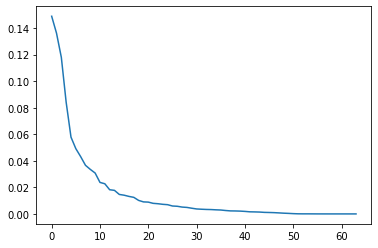

In [58]:
plt.plot(
    range(len(pca_mnist.explained_variance_ratio_)),
    pca_mnist.explained_variance_ratio_
)

Visualizamos la suma acumulada de las varianzas explicadas por cada componente.

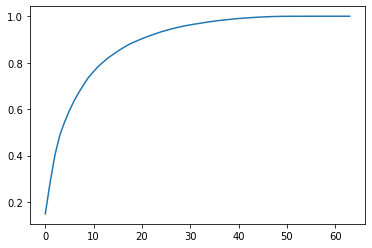

In [32]:
plt.plot(
    range(len(pca_mnist.explained_variance_ratio_)),
    np.cumsum(pca_mnist.explained_variance_ratio_)
)

## Aplicación

Proyectemos nuestro conjunto de datos sobre sólo los 2 primeros componentes principales para visualizar el conjunto de datos en un gráfico de dispersión.

In [59]:
mnist_2d = np.dot(
    pixels - pca_mnist.mean_,
    pca_mnist.components_[:2].T
)

Confirmamos que nuestro conjunto de datos transformado sólo tiene 2 columnas.

In [60]:
mnist_2d.shape

(1797, 2)

In [47]:
mnist_2d

array([[ -1.25946645,  21.27488348],
       [  7.9576113 , -20.76869896],
       [  6.99192297,  -9.95598641],
       ...,
       [ 10.8012837 ,  -6.96025223],
       [ -4.87210009,  12.42395362],
       [ -0.34438963,   6.36554919]])

Cada uno de los números tiende a acumularse junto a sus compañeros de clase.

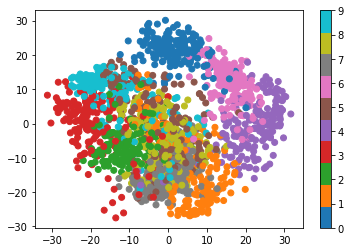

In [49]:
plt.scatter(
    mnist_2d[:,0],
    mnist_2d[:,1],
    c=label,
    cmap='tab10'
)
plt.colorbar()

Reconstruyamos las dimensiones originales desde nuestro conjunto de datos transformado utilizando sólo las 2 primeras componentes principales.

In [61]:
mnist_reconstructed = np.dot(
    mnist_2d,
    pca_mnist.components_[:2]
) + pca_mnist.mean_

Confirmamos que nuestro conjunto de datos reconstruido tiene el número de columnas original.

In [62]:
mnist_reconstructed.shape

(1797, 64)

In [53]:
mnist_reconstructed

array([[ 6.99637535e-17,  1.10626731e-01,  4.44191091e+00, ...,
         1.06358813e+01,  2.52788111e+00,  2.36463972e-01],
       [-6.94932729e-17,  3.75995698e-01,  4.44625587e+00, ...,
         2.38272456e+00,  1.37261165e+00,  4.12321264e-01],
       [-3.38772220e-17,  2.83433033e-01,  4.13127735e+00, ...,
         4.37965006e+00,  1.61831177e+00,  3.50984180e-01],
       ...,
       [-2.47331476e-17,  1.87218779e-01,  3.13311095e+00, ...,
         4.56836045e+00,  1.53717901e+00,  2.87234295e-01],
       [ 4.15911153e-17,  2.62611028e-01,  5.68352463e+00, ...,
         9.39498371e+00,  2.48790300e+00,  3.37169581e-01],
       [ 2.09277380e-17,  2.45467785e-01,  4.96927985e+00, ...,
         7.91962018e+00,  2.20433469e+00,  3.25816319e-01]])

Así se ve el primer número del conjunto de datos sólo utilizando las 2 primeras componentes principales.

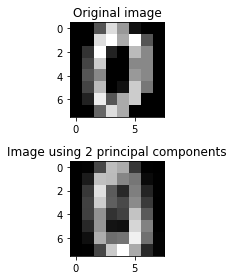

In [52]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    pixels.iloc[0,:].values.reshape(8,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    mnist_reconstructed[0].reshape(8,-1),
    cmap="gray"
)
axs[1].set_title("Image using 2 principal components")
fig.tight_layout()